In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings(action='ignore') 
sns.set_palette("pastel")
sns.set(style='whitegrid')

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df['species'] = iris.target
df['species'] = df['species'].map({0:'seotsa', 1:'versicolor', 2:'virginica'})
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,seotsa
1,4.9,3.0,1.4,0.2,seotsa
2,4.7,3.2,1.3,0.2,seotsa
3,4.6,3.1,1.5,0.2,seotsa
4,5.0,3.6,1.4,0.2,seotsa


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
x = df.drop('species', axis=1)
y = df['species']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=22)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [6]:
# Logistic Regression Model
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
print("The accuracy of Logistic Regression is ", metrics.accuracy_score(lr_predict, y_test))

The accuracy of Logistic Regression is  0.9555555555555556


In [7]:
lr1 = LogisticRegression(max_iter=1000)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=22)
score = cross_val_score(lr1, x, y, cv=cv)
print("The accuracy of Logistic Regression 1 is ", score.mean())
print("Standard Deviation is ", score.std())

The accuracy of Logistic Regression 1 is  0.9555555555555555
Standard Deviation is  0.014054567378526117


In [8]:
# SVM Model 
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
svm_predict = svm_model.predict(x_test)
print("The accuracy of SVM is ", metrics.accuracy_score(svm_predict, y_test))

The accuracy of SVM is  0.9333333333333333


In [9]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
detr = DecisionTreeClassifier()
detr.fit(x_train, y_train)
detr_predict = detr.predict(x_test)
print("The accuracy of Decision Tree is ", metrics.accuracy_score(detr_predict, y_test))

The accuracy of Decision Tree is  0.9111111111111111


In [10]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(x_train, y_train)
dt_model_predict = dt_model.predict(x_test)
print("The accuracy of Decision Tree 1 is ", metrics.accuracy_score(dt_model_predict, y_test))

The accuracy of Decision Tree 1 is  0.9333333333333333


In [11]:
# Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_predict = nb.predict(x_test)
print("The accuracy of Naive Bayes Classification is ", metrics.accuracy_score(nb_predict, y_test))

The accuracy of Naive Bayes Classification is  0.9555555555555556


In [12]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(x_train, y_train)
rfc_predict = rfc.predict(x_test)
print("The accuracy of Random Forest is ", metrics.accuracy_score(rfc_predict, y_test))

The accuracy of Random Forest is  0.9555555555555556


In [13]:
rfc1 = RandomForestClassifier()
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(rfc1, x, y, cv=cv)
print("The accuracy of Logistic Regression 1 is ", score.mean())
print("Standard Deviation is ", score.std())

The accuracy of Logistic Regression 1 is  0.9333333333333333
Standard Deviation is  0.034426518632954824


In [14]:
# Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
etc_predict = etc.predict(x_test)
print("The accuracy of Random Forest is ", metrics.accuracy_score(etc_predict, y_test))

The accuracy of Random Forest is  0.9333333333333333


In [15]:
# XGBoost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xg_model = xgb.XGBClassifier()
xg_model = xg_model.fit(x_train, y_train)
xg_model_predict = xg_model.predict(x_test)
print("The accuracy of XGBoost is ", metrics.accuracy_score(xg_model_predict, y_test))
print(xg_model.score(x_test, y_test))

[06:50:53] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of XGBoost is  0.9333333333333333
0.9333333333333333


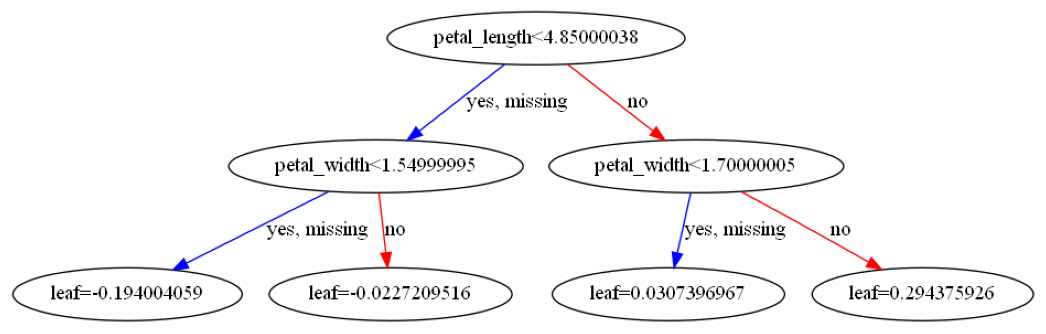

In [16]:
from xgboost import plot_tree
xgb1 = xgb.XGBClassifier(verbosity=0)
xgb1_train = xgb1.fit(x_train, y_train)
xgb1_predict = xgb1_train.predict(x_test)
xgb_acc = xgb1.score(x_test, y_test)
plot_tree(xgb1, num_trees=5)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))